# Get isochrones

In [3]:
from utils_spatial import *
access_token = os.environ.get("access_token_dp")

In [4]:
# Country and Amenity
###########################
amenity = 'hospital'
amenity = 'school'
# Transportation profile
###########################
profile='driving'

# Time profile
###########################
time_profiles=[45, 15, 30]


In [5]:
# amenity DB
#amenities_full = pd.read_csv(scldatalake + 'Geospatial infrastructure/Healthcare Facilities/healthcare_facilities.csv', low_memory=False).dropna()
amenities_full = pd.read_csv(scldatalake + 'Geospatial infrastructure/Education Facilities/education_facilities.csv', low_memory=False).dropna()
amenity = np.unique(amenities_full.amenity)[0]

In [6]:
countries = pd.read_excel(scldatalake + 'Manuals and Standards/IADB country and area codes for statistical use/IADB_country_codes_admin_0.xlsx', engine='openpyxl')
countries = countries[~(countries.iadb_region_code.isna())]
countries = np.unique(countries.isoalpha3)
countries

array(['ARG', 'BHS', 'BLZ', 'BOL', 'BRA', 'BRB', 'CHL', 'COL', 'CRI',
       'DOM', 'ECU', 'GTM', 'GUY', 'HND', 'HTI', 'JAM', 'MEX', 'NIC',
       'PAN', 'PER', 'PRY', 'SLV', 'SUR', 'TTO', 'URY', 'VEN'],
      dtype=object)

In [ ]:
%%capture
output = create_isochrone_analysis_countries(amenities_full, countries)

# Geojson

In [34]:
#%%capture
geom = gpd.GeoDataFrame(output, geometry='multipolygon')

In [37]:
geom[['isoalpha3', 'amenity', 'profile', 'minutes', 'multipolygon']].to_file(f"../data/LAC_{amenity}_{profile}.geojson", driver='GeoJSON')

# CSV

In [45]:
output.to_csv(f"../data/LAC_{amenity}_{profile}.csv", index=False)
output = output[['isoalpha3', 'amenity', 'profile', 'minutes', 'multipolygon']]
output.to_csv(f"../data/LAC_{amenity}_{profile}_subset.csv", index=False)

<AxesSubplot:>

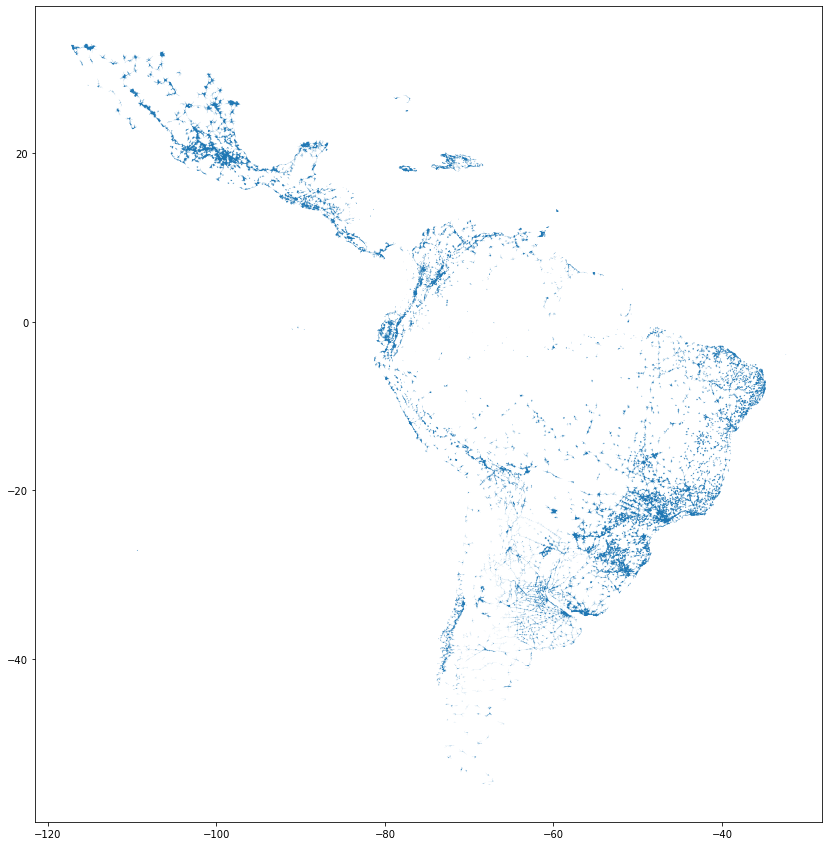

In [41]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 15]
geom.plot()